# ML-DRIVEN APPROACH FOR BREAST CANCER CLASSIFICATION FROM MAMMOGRAPHIC IMAGES

In [2]:
# importing libraries
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
from skimage.transform import resize
from skimage.io import imread
import numpy as npz
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,precision_score,accuracy_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from skimage import io, transform
from sklearn import preprocessing
import numpy as np
import joblib
import json

In [3]:
Categories = ['Cancer','Normal']
datadir =r"Dataset"

if 'flat_data.npy' in os.listdir() and 'target.npy' in os.listdir():
    # Load the data from the saved files if they already exist
    flat_data = np.load('flat_data.npy')
    target = np.load('target.npy')
else:
    # Initialize the arrays to store the data
    flat_data_arr = [] # input array
    target_arr = [] # output array

    # Load and preprocess the data
    for i in Categories:
        print(f'loading... category: {i}')
        path = os.path.join(datadir, i)
        for img in os.listdir(path):
            img_array = imread(os.path.join(path, img))
            img_resized = resize(img_array, (150, 150, 3))
            flat_data_arr.append(img_resized.flatten())
            target_arr.append(Categories.index(i))
        print(f'loaded category: {i} successfully')

    # Convert the lists to NumPy arrays
    flat_data = np.array(flat_data_arr)
    target = np.array(target_arr)

    # Save the data to files for future use
    np.save('flat_data.npy', flat_data)
    np.save('target.npy', target)


In [4]:
flat_data

array([[0.03574649, 0.03574649, 0.03574649, ..., 0.54792902, 0.54792902,
        0.54792902],
       [0.48933975, 0.48933975, 0.48933975, ..., 0.99607843, 0.99607843,
        0.99607843],
       [0.99607596, 0.99607596, 0.99607596, ..., 0.99607843, 0.99607843,
        0.99607843],
       ...,
       [0.12254748, 0.12254748, 0.12254748, ..., 0.31330455, 0.31330455,
        0.31330455],
       [0.03405707, 0.03405707, 0.03405707, ..., 0.37989542, 0.37989542,
        0.37989542],
       [0.92556384, 0.92556384, 0.92556384, ..., 0.09525834, 0.09525834,
        0.09525834]])

In [5]:
target

array([0, 0, 0, ..., 1, 1, 1])

In [6]:
#splitting the data
X_train,X_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.30,random_state=42)

In [7]:
X_train.shape

(4426, 67500)

In [8]:
X_test.shape

(1898, 67500)

In [9]:
y_train

array([0, 0, 0, ..., 1, 1, 0])

In [10]:
precision = []
recall = []
fscore = []
accuracy = []


def performance_metrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=Categories)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = Categories, yticklabels = Categories, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(Categories)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

In [11]:
#Applying Random Forest Classifier machine learning model

Random Forest Classifier Accuracy    : 84.45732349841938
Random Forest Classifier Precision   : 84.19566100630674
Random Forest Classifier Recall      : 83.76228066876583
Random Forest Classifier FSCORE      : 83.95137631902914

 Random Forest Classifier classification report
               precision    recall  f1-score   support

      Cancer       0.88      0.86      0.87      1134
      Normal       0.79      0.83      0.81       764

    accuracy                           0.84      1898
   macro avg       0.84      0.84      0.84      1898
weighted avg       0.85      0.84      0.85      1898



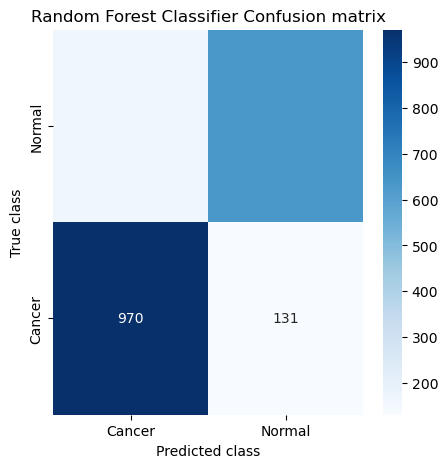

In [12]:
import os
import joblib
from sklearn.ensemble import RandomForestClassifier

model_path = 'model/rfc_classifier'
if os.path.exists(model_path):
    rf = joblib.load(model_path)
else:
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    joblib.dump(rf, model_path)

predict = rf.predict(X_test)
performance_metrics('Random Forest Classifier', predict, y_test)


In [13]:
#KNeighbors Classifier

KNeighbors Classifier Accuracy    : 73.28767123287672
KNeighbors Classifier Precision   : 72.59095958894598
KNeighbors Classifier Recall      : 72.2465717831514
KNeighbors Classifier FSCORE      : 72.38583487217896

 KNeighbors Classifier classification report
               precision    recall  f1-score   support

      Cancer       0.79      0.76      0.77      1140
      Normal       0.66      0.69      0.67       758

    accuracy                           0.73      1898
   macro avg       0.72      0.73      0.72      1898
weighted avg       0.74      0.73      0.73      1898



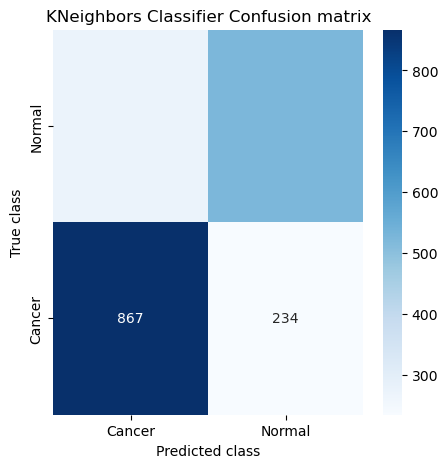

In [14]:
model2 = 'model/knn_classifier'
if os.path.exists(model2):
    knn = joblib.load(model2)
else:
    knn = KNeighborsClassifier(n_neighbors=6,metric='euclidean')
    knn.fit(X_train,y_train)
    joblib.dump(knn, model2)

predict = knn.predict(X_test)
performance_metrics('KNeighbors Classifier', predict, y_test)

Extra Trees Classifier model loaded successfully.
Extra Trees Classifier Accuracy    : 84.87881981032666
Extra Trees Classifier Precision   : 84.62194041830813
Extra Trees Classifier Recall      : 84.21219673685493
Extra Trees Classifier FSCORE      : 84.39260565145798

 Extra Trees Classifier classification report
               precision    recall  f1-score   support

      Cancer       0.88      0.86      0.87      1132
      Normal       0.80      0.83      0.82       766

    accuracy                           0.85      1898
   macro avg       0.84      0.85      0.84      1898
weighted avg       0.85      0.85      0.85      1898



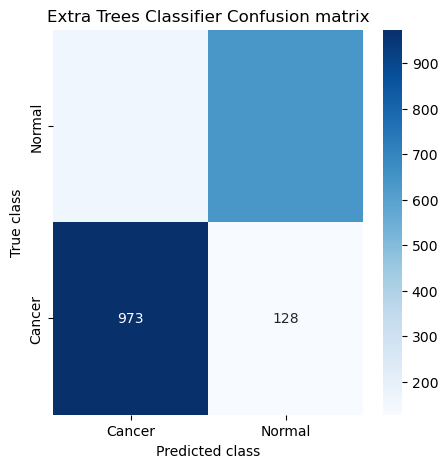

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

# Define the path for the Extra Trees Classifier model
model3 = 'model/etc_model'

# Check if the model already exists
if os.path.exists(model3):
    # Load the model from the file
    etc = joblib.load(model3)
    print("Extra Trees Classifier model loaded successfully.")
else:
    # Create a new Extra Trees Classifier model
    etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
    # Train the model
    etc.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(etc, model3)
    print("Extra Trees Classifier model trained and saved successfully.")

# Use the model to make predictions on the test set
predict = etc.predict(X_test)

# Calculate and print performance metrics
performance_metrics('Extra Trees Classifier', predict, y_test)


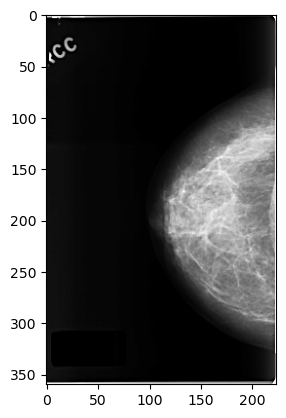

The predicted image is: Cancer


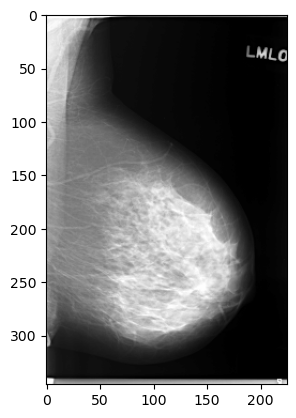

The predicted image is: Cancer


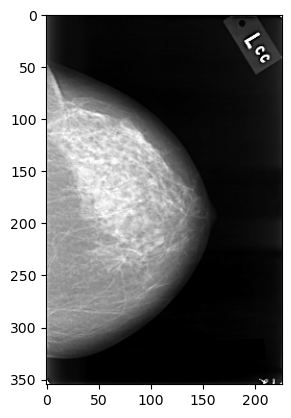

The predicted image is: Cancer


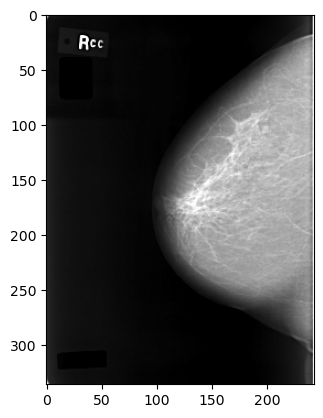

The predicted image is: Cancer


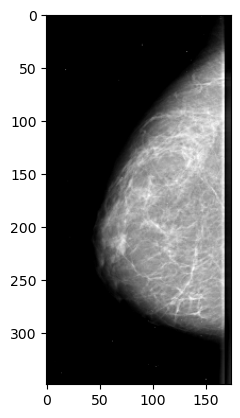

The predicted image is: Normal


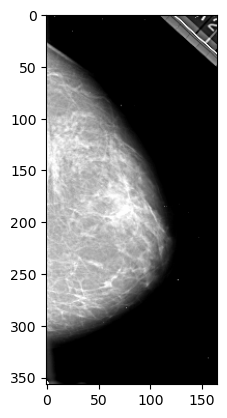

The predicted image is: Normal


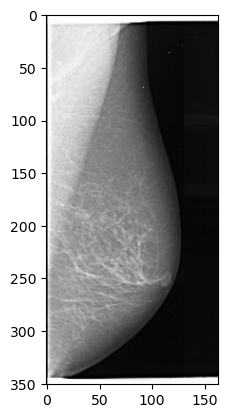

The predicted image is: Normal


In [16]:
path = "testImages"
Categories = {0: "Cancer", 1: "Normal"}  # Define your categories with corresponding labels

for filename in os.listdir(path):
    img_path = os.path.join(path, filename)  # Construct the complete image path
    img = imread(img_path)
    
    plt.imshow(img)
    plt.show()
    
    img_resize = resize(img, (150, 150, 3))
    l = [img_resize.flatten()]
    
    # Make predictions using your pre-trained model
    prediction = rf.predict(l)[0]
    predicted_category = Categories[prediction]
    print("The predicted image is:", predicted_category)

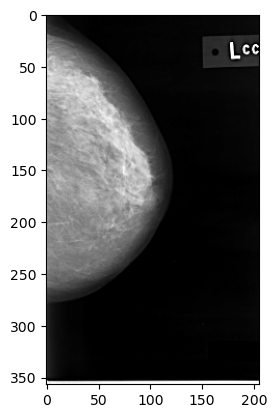

The predicted image is : Cancer


In [17]:
path = r"Dataset\Cancer\40_C_0012_1.LEFT_CC.LJPEG.1_highpass.png"
img = imread(path)
plt.imshow(img)
plt.show()
img_resize = resize(img,(150,150,3))
l = [img_resize.flatten()]
print("The predicted image is : "+Categories[rf.predict(l)[0]])

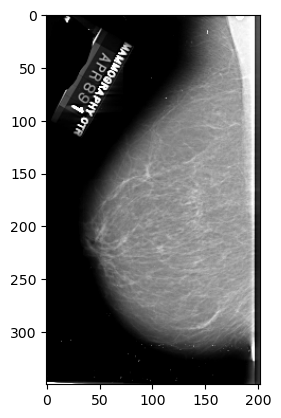

The predicted image is : Normal


In [18]:
path = r"Dataset\Normal\17_A_0009_1.LEFT_MLO.LJPEG.1_highpass.png"
img = imread(path)
plt.imshow(img)
plt.show()
img_resize = resize(img,(150,150,3))
l = [img_resize.flatten()]
print("The predicted image is : "+Categories[knn.predict(l)[0]])